## Context 

The dataset analysed as part of this exercise contains 569 observations across cancer diagnosis with 30 lab measurements.  The diagonosis provided are coded as malignant (positive) or benign (negative) results. 

As part of this analysis the data wsa cleaned by removing nulls. Some EDA including statistical and correlation were completed. The results were then examined for outliers which were then normalised through the feature scaling method which resluted in 67 records being removed, of which 44 were malignant and 23 were benign. An observation around outliers was an imbalnce in the malignant (212) vs benign (357) data

The cross validation method was applied across the KNN, Decision Tree and Random Forest algorithms to detect accuracy. All three algorithms were also run individually to ascertain the actual accuracy. Overall the KNN algorithm accuracy was the lowest in the cross validation and in running the actual algorithm. The Grid Search Cross Validation (CV) method was applied to improve the accuracy via hyperparameters 

In [1]:
#importing libraries 
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix, make_scorer
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn import svm
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
from sklearn.model_selection import cross_val_score
from collections import Counter



In [2]:
# importing the data from a csv file


df= pd.read_csv('/Users/raniya/Documents/Durham College/AI Algorithms/Exe 2/dataset.csv') 
#read the csv file (put 'r' before the path string to address any special characters in the path, such as '\'). Don't forget to put the file name at the end of the path + ".csv"
print (df)

            id diagnosis  radius_mean  texture_mean  perimeter_mean  \
0     87139402         B        12.32         12.39           78.85   
1      8910251         B        10.60         18.95           69.28   
2       905520         B        11.04         16.83           70.92   
3       868871         B        11.28         13.39           73.00   
4      9012568         B        15.19         13.21           97.65   
..         ...       ...          ...           ...             ...   
564  911320502         B        13.17         18.22           84.28   
565     898677         B        10.26         14.71           66.20   
566     873885         M        15.28         22.41           98.92   
567     911201         B        14.53         13.98           93.86   
568    9012795         M        21.37         15.10          141.30   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0        464.1          0.10280           0.06981         0.03987   
1        

In [3]:
#validating data import 
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [4]:
# finding out basic information about the dataset

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 569 non-null    int64  
 1   diagnosis          569 non-null    object 
 2   radius_mean        569 non-null    float64
 3   texture_mean       569 non-null    float64
 4   perimeter_mean     569 non-null    float64
 5   area_mean          569 non-null    float64
 6   smoothness_mean    569 non-null    float64
 7   compactness_mean   569 non-null    float64
 8   concavity_mean     569 non-null    float64
 9   points_mean        569 non-null    float64
 10  symmetry_mean      569 non-null    float64
 11  dimension_mean     569 non-null    float64
 12  radius_se          569 non-null    float64
 13  texture_se         569 non-null    float64
 14  perimeter_se       569 non-null    float64
 15  area_se            569 non-null    float64
 16  smoothness_se      569 non

In [5]:
# Checking for any missing data. None found on execution
df.isnull().sum()

id                   0
diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
points_mean          0
symmetry_mean        0
dimension_mean       0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
concavity_se         0
points_se            0
symmetry_se          0
dimension_se         0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
points_worst         0
symmetry_worst       0
dimension_worst      0
dtype: int64

# EDA
## Initial statistical analysis

It was observed that quiete a few of the columns have dependancies on each other and hence were identified to start dropping from the overall dataset in subsequentd steps

In [6]:
# statistical data for each of the data columns
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Preparing data for furhter EDA 

In [7]:
# Save labels in y
y = df["diagnosis"]

In [8]:
# Dropping unnecessary columns from x. Y is our diagnosis and we don't need the ID column 
X = df.drop(["id", "diagnosis"], axis=1)

### Exploring co-relation between features 

<AxesSubplot:>

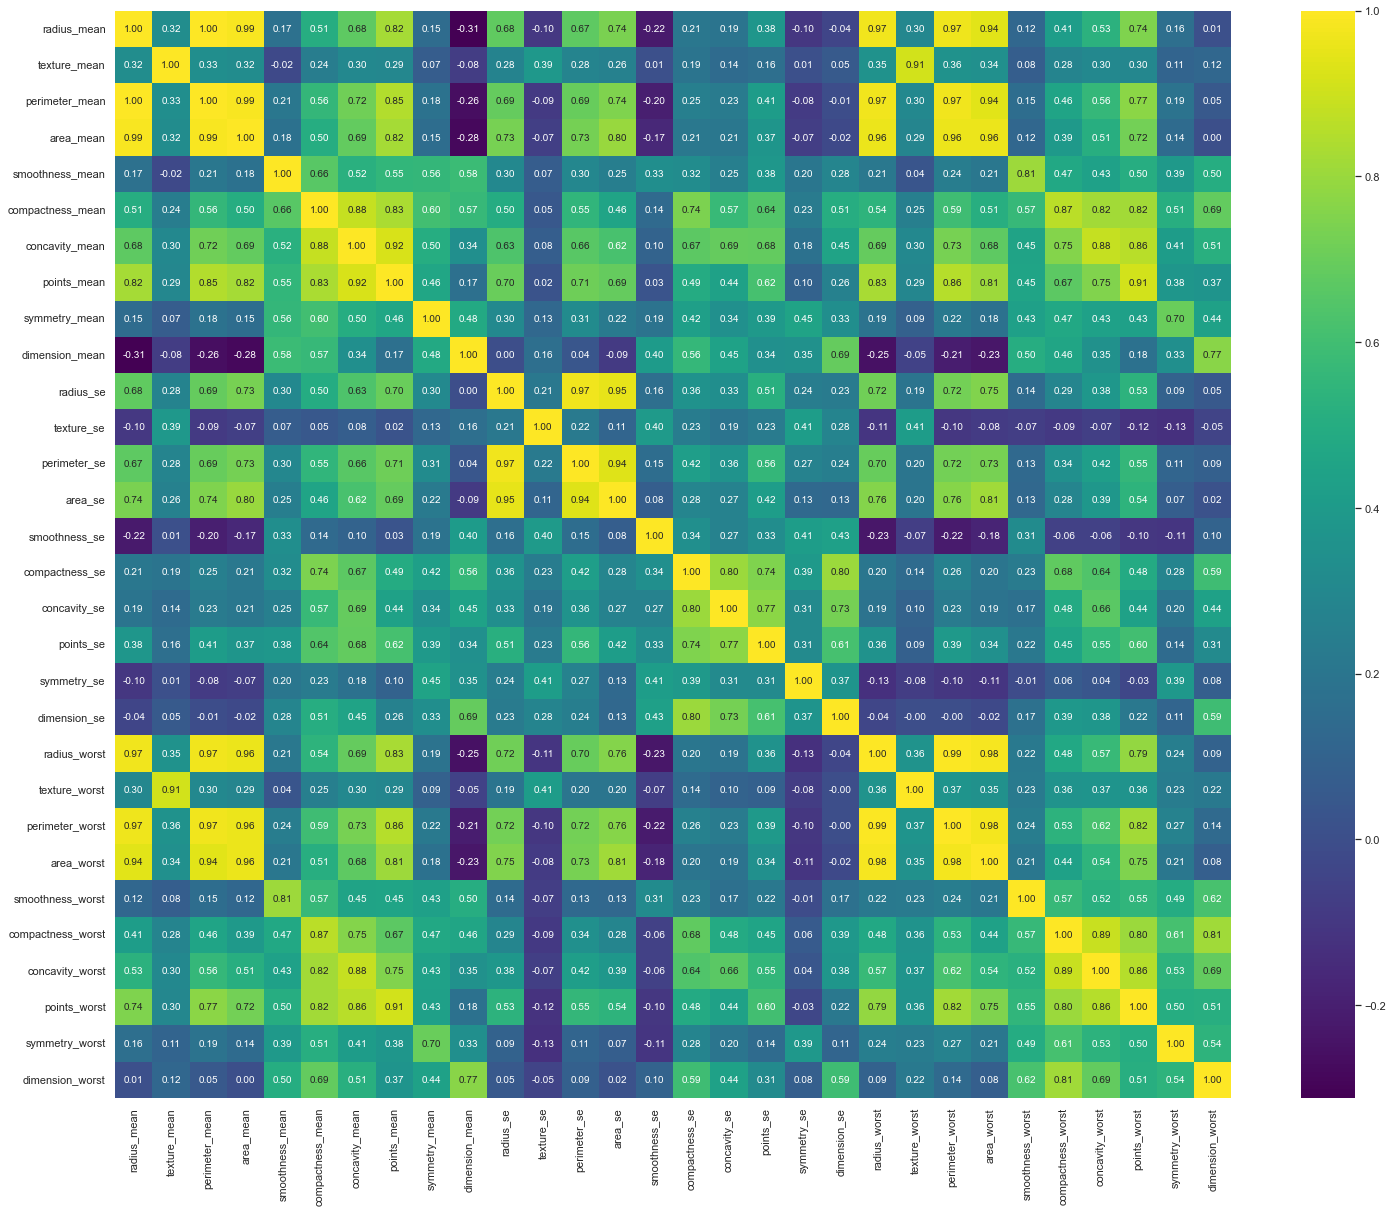

In [9]:
# Plot a Correlation chart
corr = X.corr() # .corr is used for find corelation
#plt.figure(figsize=(20,15))
sns.set(rc={'figure.figsize':(25,20)})
# plot a heatmap
sns.heatmap(corr, cbar = True, annot=True, fmt= '.2f',annot_kws={'size': 10},
           xticklabels= X.columns, yticklabels= X.columns,
           cmap= 'viridis') 

Based on the correlation we can see that quite a few of the dimensions are worked out from each other and do not contribute to further analysis, hence they were excluded from the dataset
Hence dropping them from our dataset before doing further analysis

In [10]:
# Drop columns unnecessary columns 
X = X.drop(["perimeter_mean", "area_mean", "radius_worst", "area_worst", "perimeter_worst"], axis=1)
X = X.drop(["texture_worst", "perimeter_se", "area_se"], axis=1)

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   radius_mean        569 non-null    float64
 1   texture_mean       569 non-null    float64
 2   smoothness_mean    569 non-null    float64
 3   compactness_mean   569 non-null    float64
 4   concavity_mean     569 non-null    float64
 5   points_mean        569 non-null    float64
 6   symmetry_mean      569 non-null    float64
 7   dimension_mean     569 non-null    float64
 8   radius_se          569 non-null    float64
 9   texture_se         569 non-null    float64
 10  smoothness_se      569 non-null    float64
 11  compactness_se     569 non-null    float64
 12  concavity_se       569 non-null    float64
 13  points_se          569 non-null    float64
 14  symmetry_se        569 non-null    float64
 15  dimension_se       569 non-null    float64
 16  smoothness_worst   569 non

### Outlier detection

After analysing and visualising the positive i.e. Malignant vs negative results i.e. Benign results, we can see that the data is imbalanced. There are more Benign (negative at 357) than Malignant (positive 212) results and this needs to be normalised.

In [11]:
# checking in how many cases we have a positive i.e. Malignant or negative result i.e. Benign

y_pos = [yy for yy in y if yy == 'M']
y_neg = [yy for yy in y if yy == 'B']
print('y_pos: ', len(y_pos))
print('y_neg: ', len(y_neg))

y_pos:  212
y_neg:  357


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

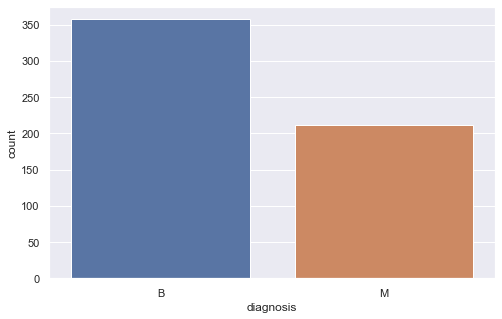

In [12]:
# Ploting a countplot to visualise the above
sns.set(rc={'figure.figsize':(8,5)})
sns.countplot(y)

## Feature Engineering

Creating a Volume Mean Feature using radius_mean

In [13]:
# Creating a empty list
mean_volume = []
# defining pi
pi = 3.1415

# calculatin mean volume for each mean radius and saving result in mean_volume list
for i in range(len(X)):
    #aving result in mean_volume list
    mean_volume.append((math.pow(X["radius_mean"][i], 3)*4*pi)/3)

# Creating a new feature
X["mean_volume"]= mean_volume    


In [14]:
#printing updated dataset
X.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,radius_se,texture_se,...,points_se,symmetry_se,dimension_se,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst,mean_volume
0,12.32,12.39,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,0.2360,0.6656,...,0.012410,0.01924,0.002248,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771,7832.635635
1,10.60,18.95,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,0.4505,1.1970,...,0.013650,0.03504,0.003318,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587,4988.769019
2,11.04,16.83,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,0.1967,1.3870,...,0.007483,0.01718,0.002198,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881,5636.156203
3,11.28,13.39,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,0.3384,1.3430,...,0.019650,0.01580,0.003442,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784,6011.780281
4,15.19,13.21,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,0.1783,0.4125,...,0.009155,0.01647,0.001767,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766,14680.779719


### Nomalising data using the Feature Scaling method 

Normalising the range of each feature so that the Euclidean distance from one feature doesn't distort the overall contribution to the final Euclidean distance. Another advantage of feature scaling is that the gradient descent converges faster hence improving the reliability of the data being used for training the machine learning algorithm


In [15]:
# Define a scaler function
def scaler(df):
    """The function receives a dataframe and returns a scaled dataframe"""
    scaler = preprocessing.MinMaxScaler()
    scaled_df = scaler.fit_transform(df)
    scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
    
    return scaled_df

# testing scaler
scaled_df = scaler(X)

scaled_df.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,radius_se,texture_se,...,points_se,symmetry_se,dimension_se,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst,mean_volume
0,0.252686,0.090632,0.452920,0.154684,0.093416,0.183897,0.454040,0.201980,0.045084,0.067495,...,0.235082,0.159819,0.046750,0.444628,0.096351,0.099201,0.322715,0.248768,0.083104,0.069942
1,0.171281,0.312479,0.399476,0.292375,0.149649,0.131312,0.435354,0.314869,0.122759,0.184936,...,0.258572,0.382141,0.083717,0.331044,0.217530,0.153035,0.272371,0.271043,0.136626,0.038900
2,0.192106,0.240785,0.497156,0.179928,0.071368,0.123260,0.330303,0.283067,0.030853,0.226927,...,0.141750,0.130832,0.045023,0.434062,0.117307,0.085224,0.255361,0.282476,0.155910,0.045967
3,0.203464,0.124450,0.575697,0.289001,0.108599,0.238370,0.359091,0.226622,0.082165,0.217203,...,0.372230,0.111414,0.088001,0.432741,0.150294,0.069241,0.295911,0.105855,0.083956,0.050067
4,0.388518,0.118363,0.243748,0.153242,0.079499,0.132058,0.333838,0.115417,0.024190,0.011559,...,0.173423,0.120842,0.030133,0.273592,0.142048,0.108786,0.281031,0.181747,0.082776,0.144693


### Detecting outliers in the scaled data

Outliers are removed by using the quartile method and defining the conditions for the outliers to be removed based on the features in the updated dataset. As a result 67 rows were removed based, of which 23 were benign and 44 were malignant. This still results in imbalanced data which could possibly skew the data. We will run the cross validation and ML algorithms to test the resultant accuracy 

In [16]:
# Defining the function to detect outliers
def remove_outliers(X, y, f=2, distance=1.5):
    
    """The function receives Features (X) and Label (y) a frequency (f) and Inter-Quartile distance (distance),  
    and returns features and labels without outliers (good_X, good_y)"""
    
    outliers  = []

    # For each feature finding the data points with extreme high or low values
    for feature in X.keys():

        # Calculating Q1 (25th percentile of the data) for the given feature
        Q1 = np.percentile(X[feature], 25)

        # Calculating Q3 (75th percentile of the data) for the given feature
        Q3 = np.percentile(X[feature], 75)

        # Using the interquartile range to calculate an outlier step (1.5 times the interquartile range)
        step = (Q3 - Q1) * distance

        outliers.append(X[~((X[feature] >= Q1 - step) & (X[feature] <= Q3 + step))].index.values)
        
        
          # Select the indices for data points you wish to remove
    flat_list = [item for sublist in outliers for item in sublist]


    freq = Counter(flat_list)
    # Create a list to store outliers to remove
    outliers_to_remove = []
    
    for key, value in freq.items():
        if value > f:
            outliers_to_remove.append(key)

    # Remove the outliers, if any were specified
    good_X = X.drop(X.index[outliers_to_remove]).reset_index(drop = True)
    good_y    = y.drop(y.index[outliers_to_remove]).reset_index(drop = True)
    # Sort list
    outliers_to_remove.sort()
    
    # Print outliers founded
    for i in range(len(outliers_to_remove)):
        print( "data point: ", outliers_to_remove[i], "is considered as an outlier to more than ", f, " features" )

    print( "All ", len(outliers_to_remove), "were removed!" )
    # return data without outliers
    return good_X, good_y 


good_X, good_y = remove_outliers(scaled_df, y, f=2, distance=1.5)


data point:  32 is considered as an outlier to more than  2  features
data point:  42 is considered as an outlier to more than  2  features
data point:  47 is considered as an outlier to more than  2  features
data point:  54 is considered as an outlier to more than  2  features
data point:  58 is considered as an outlier to more than  2  features
data point:  60 is considered as an outlier to more than  2  features
data point:  62 is considered as an outlier to more than  2  features
data point:  64 is considered as an outlier to more than  2  features
data point:  72 is considered as an outlier to more than  2  features
data point:  94 is considered as an outlier to more than  2  features
data point:  99 is considered as an outlier to more than  2  features
data point:  101 is considered as an outlier to more than  2  features
data point:  111 is considered as an outlier to more than  2  features
data point:  113 is considered as an outlier to more than  2  features
data point:  121 

In [17]:
# printnig the first 5 rows of the cleansed data set
good_X.head()


,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,radius_se,texture_se,...,points_se,symmetry_se,dimension_se,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst,mean_volume
0,0.252686,0.090632,0.452920,0.154684,0.093416,0.183897,0.454040,0.201980,0.045084,0.067495,...,0.235082,0.159819,0.046750,0.444628,0.096351,0.099201,0.322715,0.248768,0.083104,0.069942
1,0.171281,0.312479,0.399476,0.292375,0.149649,0.131312,0.435354,0.314869,0.122759,0.184936,...,0.258572,0.382141,0.083717,0.331044,0.217530,0.153035,0.272371,0.271043,0.136626,0.038900
2,0.192106,0.240785,0.497156,0.179928,0.071368,0.123260,0.330303,0.283067,0.030853,0.226927,...,0.141750,0.130832,0.045023,0.434062,0.117307,0.085224,0.255361,0.282476,0.155910,0.045967
3,0.203464,0.124450,0.575697,0.289001,0.108599,0.238370,0.359091,0.226622,0.082165,0.217203,...,0.372230,0.111414,0.088001,0.432741,0.150294,0.069241,0.295911,0.105855,0.083956,0.050067
4,0.388518,0.118363,0.243748,0.153242,0.079499,0.132058,0.333838,0.115417,0.024190,0.011559,...,0.173423,0.120842,0.030133,0.273592,0.142048,0.108786,0.281031,0.181747,0.082776,0.144693


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

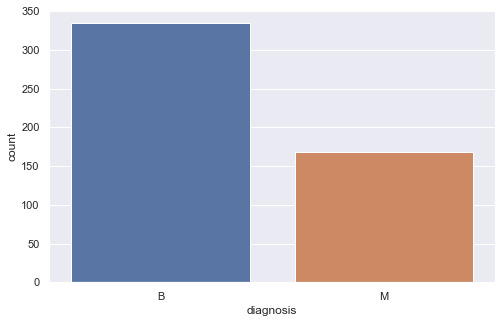

In [18]:
#visualising te data that was removed based on the malignant vs benign diagnosis 
sns.set(rc={'figure.figsize':(8,5)})

sns.countplot(good_y) 

In [19]:
#counting the no. of rows that were removed with a malignant or benign diagnosis
count = y.value_counts()
count2 = good_y.value_counts()

print('Number of Benign removed: ',count[0] - count2[0])
print('Number of Malignant removed: ',count[1] - count2[1])

Number of Benign removed:  23
Number of Malignant removed:  44


### Validation of outlier management through data visualisation

In terms of outlier management quiete a few of the malignant entries were removed i.e. 44 which has made the data more imbalanced. We will visualise the results to see if there is might be a huge impact on running the alogrithms. After running the scatter plots most outliers look like they have been removed, so we will proceed with the cross validation and subsequent steps 

In [20]:
#creating the scatter plots based on the normalised dataset

def tsne_plot(good_X, good_y):
    tsne = TSNE(n_components=2, init='random', random_state=0, perplexity=100)
    X_original_SNE = tsne.fit_transform(good_X)

    X_original_SNE_df = pd.DataFrame(X_original_SNE, columns=["d1", "d2"])
    good_y_df = pd.DataFrame(good_y, columns=["diagnosis"])

    X_original_SNE_df = pd.concat([good_y_df, X_original_SNE_df.iloc[:,0:]],axis=1)
    X_original_SNE_df.head()

    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111)

    m_SNE = X_original_SNE_df.loc[X_original_SNE_df['diagnosis'] == 'M']
    b_SNE = X_original_SNE_df.loc[X_original_SNE_df['diagnosis'] == 'B']

    ax.scatter(m_SNE['d1'], m_SNE['d2'], c='darkorange', s=100)
    ax.scatter(b_SNE['d1'], b_SNE['d2'], c='blue', s=100)
    
    ax.set_xlim([-10, 10])
    ax.set_ylim([-10, 10])

    plt.show()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


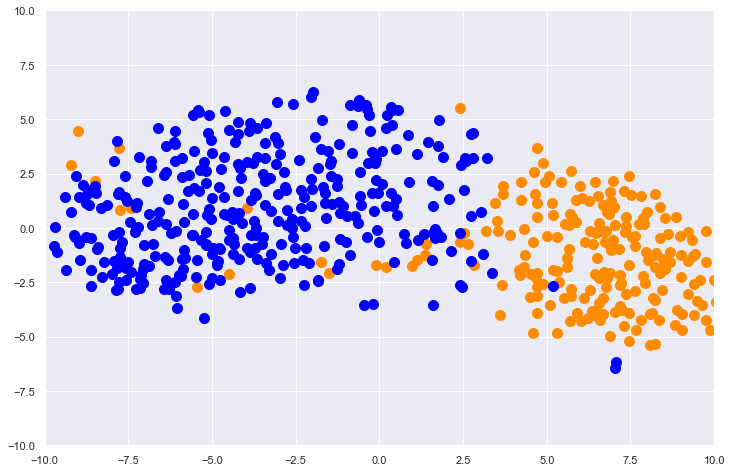

In [21]:
#creating the scatter plots based on the normalised dataset

tsne_plot(scaled_df, y)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


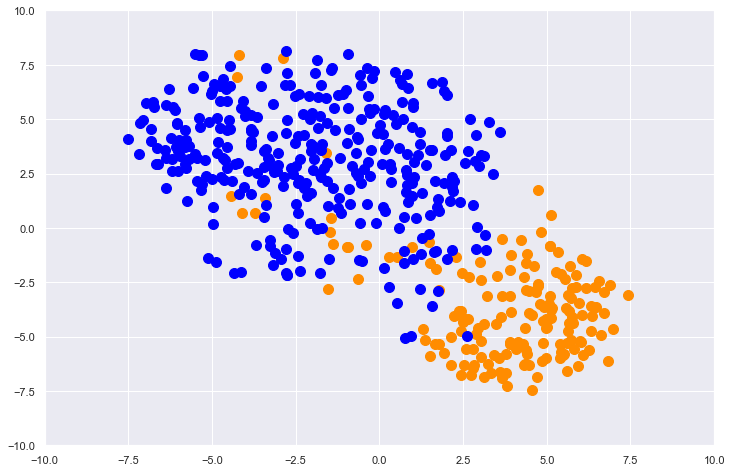

In [22]:
#creating the scatter plots based on the normalised dataset


tsne_plot(good_X, good_y)

## Modelling the data

In [23]:
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

The label encoder method was applied to represent the categorical data as numeric data to prepare it for modelling

In [24]:
#applying the label encoder method

label = LabelEncoder()
y = label.fit_transform(y)
y[:20]


array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0])

In [25]:
# Spilt the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# we used 30% test data
# check the size before beginning
print('x_train shape : {}'.format(X_train.shape))
print('x_test shape : {}'.format(X_test.shape))
print('y_train shape : {}'.format(y_train.shape))
print('y_test shape : {}'.format(y_test.shape))

x_train shape : (398, 31)
x_test shape : (171, 31)
y_train shape : (398,)
y_test shape : (171,)


### Cross validation

Using the cross validation method, we get an initial idea of the level of accuracy between the different classifiers indicated. With KNN at 64%, Decision Tree at 94% and Random Forest at 96%. We will run the actual algorithms to see if the accuracy level changes. Overall it is suggested that the Random Forest method is the most accurate at 96% which is pretty good. The KNN algorithm requires the most improvement with an almost 70% score

In [26]:
models = []

models.append(('KNN', KNeighborsClassifier()))
models.append(('DT',  DecisionTreeClassifier()))
models.append(('RF',  RandomForestClassifier(n_estimators=100)))

In [27]:
# Train/Test split
X_train_cross, X_test_cross, y_train_cross, y_test_cross = train_test_split(X, y, random_state=0)

In [28]:
names = []
scores = []

for name, model in models:
    model.fit(X_train_cross, y_train_cross)
    y_pred_cross = model.predict(X_test_cross)
    scores.append(accuracy_score(y_test_cross, y_pred_cross))
    names.append(name)

tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  KNN  0.699301
1   DT  0.895105
2   RF  0.965035


In [29]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.3)
print(X_train.shape)

(398, 31)


### Random Forest Classifier - accuracy at 94.7%

In [30]:
#applying the random tree classifier

rfc = RandomForestClassifier(criterion = 'entropy', n_estimators = 100, random_state = 42)
rfc.fit(X_train, y_train)
# Evaluating on the test set
rfc_pred_test = rfc.predict(X_test)
# Calculating the accuracy of the model i.e. how often is the model correct
acc_rf = round( metrics.accuracy_score(y_test, rfc_pred_test) * 100 , 2 )
print( 'Accuracy of the Random Forest model : ', acc_rf )

Accuracy of the Random Forest model :  94.74


### Decsion Tree Classifer - accuracy at 94.1%

In [31]:
#applying the decision tree classifier 

tree = DecisionTreeClassifier(criterion = "entropy" , random_state = 100,max_depth=3, min_samples_leaf=5)
# Evaluating on the training set
tree.fit(X_train, y_train)
# Evaluating on the test set
tree_pred_test = tree.predict(X_test)
# Calculating the accuracy of the model i.e. how often is the model correct
acc_dt = round( metrics.accuracy_score(y_test, tree_pred_test) * 100 , 2 )
print( 'Accuracy of the Decision Tree model : ', acc_dt )

Accuracy of the Decision Tree model :  94.15


### KNN Classifer - accuracy at 84.2%

In [32]:
#applying the KNN classifier 

KNN = KNeighborsClassifier(n_neighbors=1)
KNN.fit(X_train,y_train)
y_predicted_knn = KNN.predict(X_test) 
# Calculating the accuracy of the model i.e. how often is the model correct
print("Accuracy of the KNN model:",metrics.accuracy_score(y_test, y_predicted_knn))

Accuracy of the KNN model: 0.8421052631578947


### Random Forest model has the ability to predict accurately 94.7% of the time

Running the actual algorithms we can see that all of them improve on the level of accuracy first indicated through the cross validation method. The Random Tree model is still the most accurate at 94.7% with the Decision Tree Classifier a close second. The KNN model still lags behind at around 84.2% but has vastly improved. 

We can optimise hyper parameters based on the grid search cross validation method, particularly on the KNN model to see if the accuracy can be further improved 

## Hyperparameter optimisation
### KNN identified as a candidate for hyper parameter optimisation to increase accuracy levels
 
The Grid Search Cross validation method is used to optimise the hyper parameters based on the KNN model. The resulting optimisation can increase the accuracy of the KNN model 

In [33]:
# Import library of KNeighborsClassifier model


# Create a KNN Classifier
knn = KNeighborsClassifier()

# Hyperparameter Optimization
parameters = {'n_neighbors': [2,3], 
              'weights': ['distance'],
              'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
             }

# Run the grid search
grid_obj = GridSearchCV(knn, parameters, verbose = 1, cv=3, n_jobs = -1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the knn to the best combination of parameters
knn = grid_obj.best_estimator_

# Train the model using the training sets 
knn.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


KNeighborsClassifier(n_neighbors=2, weights='distance')

# Conclusion

The overall dataset used was a bit imbalanced even after normalisation. However the overall outliers were reduced. Of all the three models examined the results of the cross validation were validated and improved on. The Random Forest Tree Classifier is the most accurate based on the normalised dataset at 94.7%. We also tested the ability to use hyper parmater optimisation to further identify how to improve the least accurate model i.e. KNN neighbours 